In [206]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from ipywidgets import interact
from scipy.optimize import minimize

# Generate dataset

In [207]:
def gen_random_line(x0=0, x1=10, points=100, mean=0, div=0, slope=1, intercept=0):
    line = lambda x: slope*x + intercept + random.gauss(mean, div)
    np_line = np.vectorize(line)
    x = np.linspace(x0, x1, points)
    y = np_line(x)
    return (x, y)

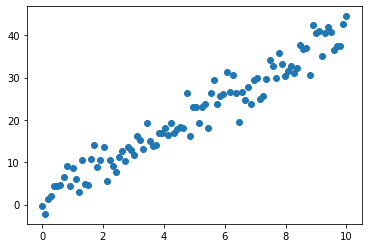

In [208]:
x, y = gen_random_line(0, 10,100, 0, 3, 4, 1)
plt.scatter(x, y)

# Define Loss Function

In [209]:
A = np.array(list(zip(x, [1]*len(x))))

In [210]:
def loss_func(w):
    W = np.array([w[0], w[1]])
    loss = np.matmul(A, W) -y
    return np.linalg.norm(loss)**2

# Optimize using SciPy optimize

In [211]:
r = minimize(loss_func, x0=(0, 0))

In [212]:
r

      fun: 801.2214690827227
 hess_inv: array([[ 0.00058812, -0.00294059],
       [-0.00294059,  0.01970297]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([3.94200098, 1.56942424])

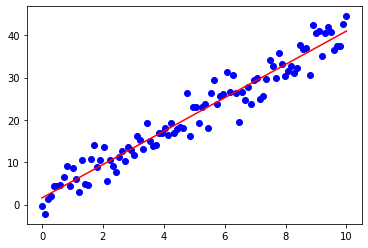

In [213]:
plt.scatter(x, y, color='blue')
x_space = np.linspace(0, 10, 100)
y_space = r.x[0]*x_space + r.x[1]
plt.plot(x_space, y_space, color = 'red')

# Manual gradient descent

In [215]:
def dWdw(w, func, dx):
    h = np.array([dx, 0])
    return (func(w+h)-func(w))/dx
    

def dWdb(w, func, dx):
    h = np.array([0, dx])
    return (func(w+h)-func(w))/dx

def grad(w, func, dx):
    return np.array([dWdw(w, func, dx), dWdb(w, func, dx)])

In [229]:
w = 5*np.random.random(2) - 2.5               #initial value guess
learning_rate = 0.0001
w_iters, b_iters = [], []
iters = 5000
loss = []
for i in range(iters):
    w = w - learning_rate*grad(w, loss_func, 10**-10)               #gradient descent
    w_iters.append(w[0])
    b_iters.append(w[1])
    loss.append(np.linalg.norm(grad(w, loss_func, 10**-10)))

Text(0, 0.5, 'error')

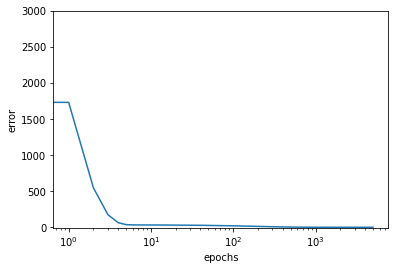

In [230]:
fig, ax = plt.subplots()
ax.plot(range(len(loss)), loss)
ax.set_xscale('log')
ax.set_ybound((-10, 3000))
ax.set_xlabel('epochs')
ax.set_ylabel('error')


In [231]:
w

array([3.94199293, 1.56947919])

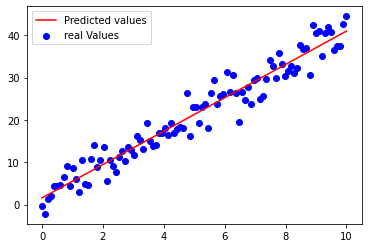

In [232]:
x_pred = np.linspace(0, 10, 100)
y_pred = w[0]*x_pred + w[1]
plt.scatter(x, y, color='blue', label='real Values')
plt.plot(x_pred, y_pred, color='red', label='Predicted values')
plt.legend()